<div style="text-align: center">
    <img src='UDC.png' width='40%'>
    <img src='ICI.png' width='20%'>
</div>
<div style="text-align: center">
    <p style="text-align: center">University of Colima<br>
    Faculty of Mechanical and Electrical Engineering<br>
    Intelligent Computer Engineering</p>
    <p style="text-align: center">Web Scraping using Python and Jupyter Notebook<br>
    Data analysis and visualization </p>
    <p style="text-align: center">
    Larios Bravo Cristian Armando 20188165<br>
    </p>
    <p style="text-align: center">6°D</p>
</div>
<div style="text-align: right">
    Place: Mexico, Colima, Coquimatlan.<br>
    Date: 15/05/2024.
</div>

# 💎INTRODUCTION 

Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. The web scraping software may directly access the World Wide Web using the Hypertext Transfer Protocol or a web browser. While web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis. Web scraping a web page involves fetching it and extracting from it. Fetching is the downloading of a page (which a browser does when a user views a page). Therefore, web crawling is a main component of web scraping, to fetch pages for later processing. Once fetched, then extraction can take place. The content of a page may be parsed, searched, reformatted, its data copied into a spreadsheet or loaded into a database. Web scrapers typically take something out of a page, to make use of it for another purpose somewhere else. An example would be to find and copy names and telephone numbers, or companies and their URLs, or e-mail addresses to a list (contact scraping).  Web scraping is used for contact scraping, and as a component of applications used for web indexing, web mining and data mining, online price change monitoring and price comparison, product review scraping (to watch the competition), gathering real estate listings, weather data monitoring, website change detection, research, tracking online presence and reputation, web mashup, and web data integration.

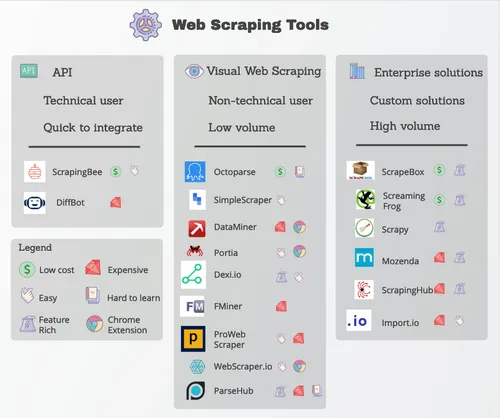

# 🐜 DEVELOPMENT 

1.  Research the state of the web scraping field of knowledge. See the link attached in this message.
2.  Create an example of scrapping a list of products with their prices from an e-commerce store, i.e. amazon, free market, etc. You can use python soup or selenium libraries  for this purpose.
3. Investigate how in ChatGPT you can generate the python code to do the Web scrapping. Create a jupyter notebook and run the python code.  Download the data in csv format and open it in the  Jupyter notebook.
4. Using Pandas functions, apply preliminary analysis to this dataset
5. Select and generate at least three types of graphs for this dataset, which show information, trends, behaviors, etc.

## 2. Create an example of scrapping a list of products with their prices from an e-commerce store, i.e. amazon, freee market, etc. You can use Python soup or selenium libraries for this porpuse

Product 
div class='sg-col-4-of-24 sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20'
Product name
span class='a-size-base-plus a-color-base a-text-normal'

Product price
span class="a-price-whole" -> precio sin decimales
span class="a-price-fraction" -> decimales

In [158]:
import csv
import requests 
from bs4 import BeautifulSoup

# Function to scrape product names and prices from Amazon
def scrape_amazon_products(url):
    # Send a GET request to the Amazon URL
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    
    # Check if the request was succesful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find all product containers
        product_containers = soup.find_all(
            'div', class_='sg-col-4-of-24 sg-col-4-of-12 s-result-item s-asin sg-col-4-of-16 sg-col s-widget-spacing-small sg-col-4-of-20')
        
        # Open a CSV file in write mode
        with open('amazon_products.csv', 'w', newline='', encoding='utf-8') as csvfile:
            # Create a CSV writer object
            writer = csv.writer(csvfile)
            # Write the header row
            writer.writerow(['Product Name', 'Price'])
            
            # Extract product names and prices
            for container in product_containers:
                # Extract product name
                product_name_tag = container.find('span', class_='a-size-base-plus a-color-base a-text-normal')
                if product_name_tag:
                    product_name = product_name_tag.text.strip()
                else:
                    product_name = "Product name not found"
                    
                # Extract product price
                product_price_tag = container.find('span', class_='a-price-whole') 
                # product_price_tag = container.find('span', class_='a-price-whole') + container.find('span', class_='a-price-fraction')
                if product_price_tag:
                    product_price = product_price_tag.text.strip()
                    # product_price = product_price.replace(",", "")
                    # product_price = product_price.replace(".", "")
                    product_price = product_price.replace(
                        ",", "") + container.find('span', class_='a-price-fraction').text.strip()
                else:
                    product_price = "Price not found"
                    
                # Write product name and price to CSV file
                writer.writerow([product_name, product_price])
                
                # Print product name and price
                print(f"Product Name: {product_name}")
                print(f"Price: {product_price}")
                print("-----------------------------")
        print("Scraping completed. Data saved to 'amazon_products.csv'")
    else:
        print("Error: Could not retrieve the Amazon page")

In [159]:
# URL of the Amazon page to scrape
# URL of the Amazon results page
url = 'https://www.amazon.com.mx/s?k=playstation+5&ref=nb_sb_ss_sx-trend-t-ps-d-purchases-ten-ca_9_0'

In [160]:
# Call the function with the URL
scrape_amazon_products(url)

Product Name: Pack Consola PlayStation®5 (Modelo Slim) con 2 Juegos - Standard
Price: 9205.98
-----------------------------
Product Name: Pack Consola PlayStation®5 (Modelo Slim) con 2 Juegos - Digital
Price: 7667.39
-----------------------------
Product Name: Consola PlayStation 5 Slim - Versión Digital Nacional con 1 año de garantia
Price: 7945.0
-----------------------------
Product Name: Sony Playstation 5 Slim Digital, 1tb Version Internacional
Price: 7949.0
-----------------------------
Product Name: PlayStation 5 Digital Edition – Marvel’s Spider-Man 2 Bundle (Slim)
Price: 8828.0
-----------------------------
Product Name: PlayStation 5 Console - Marvel’s Spider-Man 2 Bundle (slim)
Price: 9575.94
-----------------------------
Product Name: Control Inalámbrico Dualsense White - Playstation 5 - Versión Nacional Edition
Price: Price not found
-----------------------------
Product Name: Sony PlayStation Portal Remote Player - PlayStation 5
Price: 4853.92
----------------------------

## 4 Using Pandas functions, apply preliminary analysis to this dataset.

In [161]:
import pandas as pd

# Load the data
df = pd.read_csv("amazon_products.csv")
df.head()

,Product Name,Price
0,Pack Consola PlayStation®5 (Modelo Slim) con 2...,9205.98
1,Pack Consola PlayStation®5 (Modelo Slim) con 2...,7667.39
2,Consola PlayStation 5 Slim - Versión Digital N...,7945.0
3,"Sony Playstation 5 Slim Digital, 1tb Version I...",7949.0
4,PlayStation 5 Digital Edition – Marvel’s Spide...,8828.0


In [207]:
# Check and handle missing data (NaN values) if necessary.
df.isnull().sum()

Product Name    0
Price           0
dtype: int64

### Delete products without price

In [162]:
# Delete products with no price
df = df[df['Price'] != 'Price not found']

In [206]:
df['Price'] == 'Price not found'

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
Name: Price, dtype: bool

In [164]:
# Obtain basic statistical information about numerical variables.
df.describe()

,Product Name,Price
count,38,38
unique,38,35
top,Pack Consola PlayStation®5 (Modelo Slim) con 2...,699.0
freq,1,2


In [165]:
# Identify the categorical variables in the dataset.
categorical = df.select_dtypes(include=['object'])
categorical

,Product Name,Price
0,Pack Consola PlayStation®5 (Modelo Slim) con 2...,9205.98
1,Pack Consola PlayStation®5 (Modelo Slim) con 2...,7667.39
2,Consola PlayStation 5 Slim - Versión Digital N...,7945.0
3,"Sony Playstation 5 Slim Digital, 1tb Version I...",7949.0
4,PlayStation 5 Digital Edition – Marvel’s Spide...,8828.0
5,PlayStation 5 Console - Marvel’s Spider-Man 2 ...,9575.94
7,Sony PlayStation Portal Remote Player - PlaySt...,4853.92
9,Reproductor remoto PlayStation Portal™ para co...,4999.0
10,EA Sports FC 24 Standard Edition- PlayStation 5,551.65
11,God of War Ragnarök PlayStation 5,849.0


In [175]:
# Measures of central tendency of the dataset
# FASHION
print(f"Fashion of the dataset per column:")
modeDf = df.mode()
modeDf[0:1]

Fashion of the dataset per column:


,Product Name,Price
0,Auriculares inalámbricos PULSE Elite™,2799.0


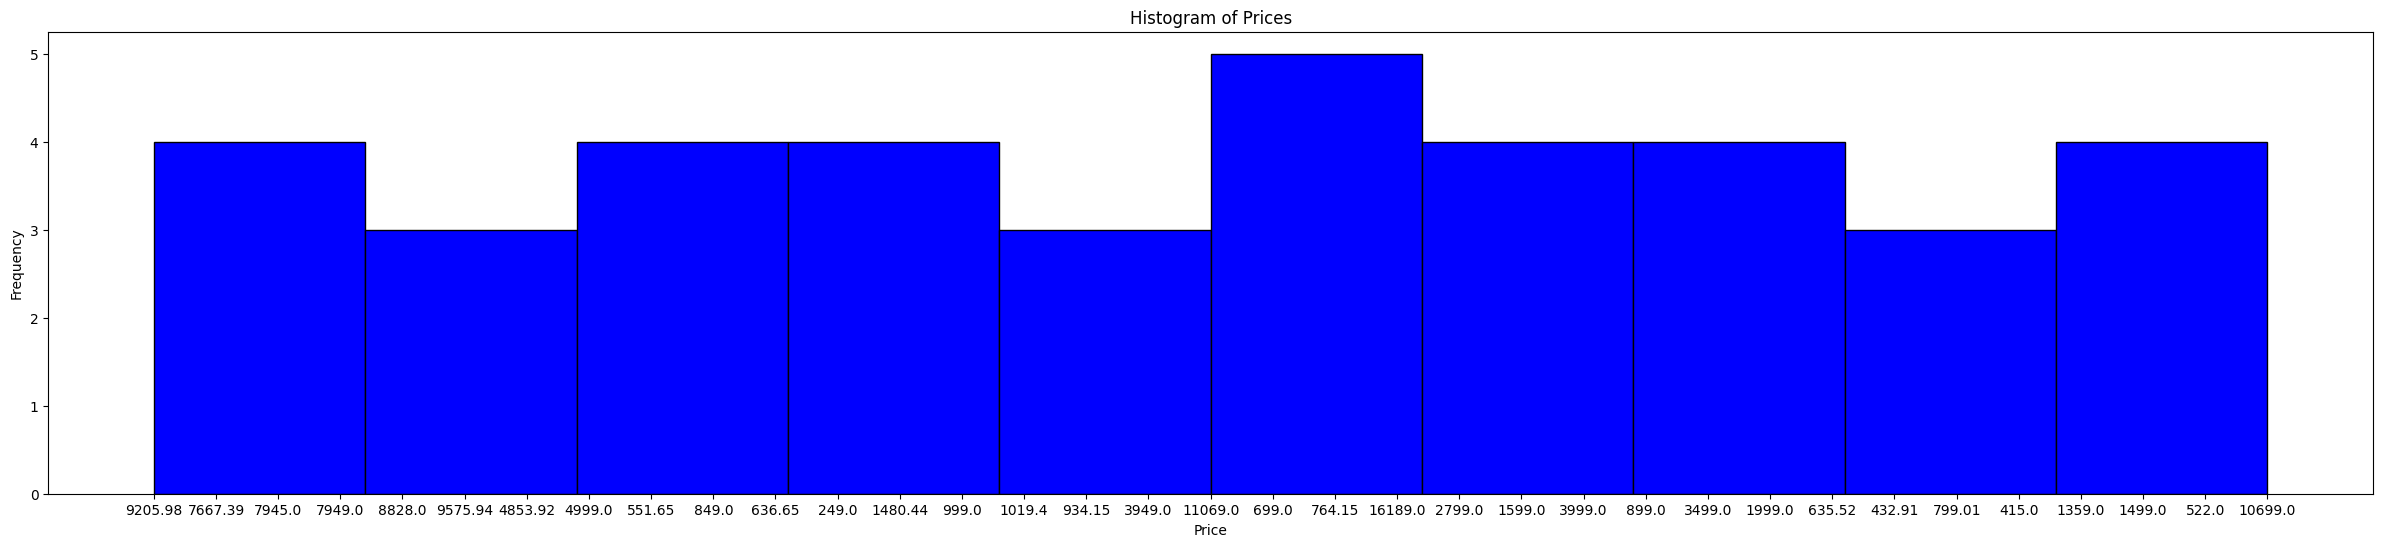

In [185]:
import matplotlib.pyplot as plt

# Plot the distribution of the prices
plt.figure(figsize=(30, 6))
plt.hist(df['Price'], bins=10, color='blue', edgecolor='black')
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

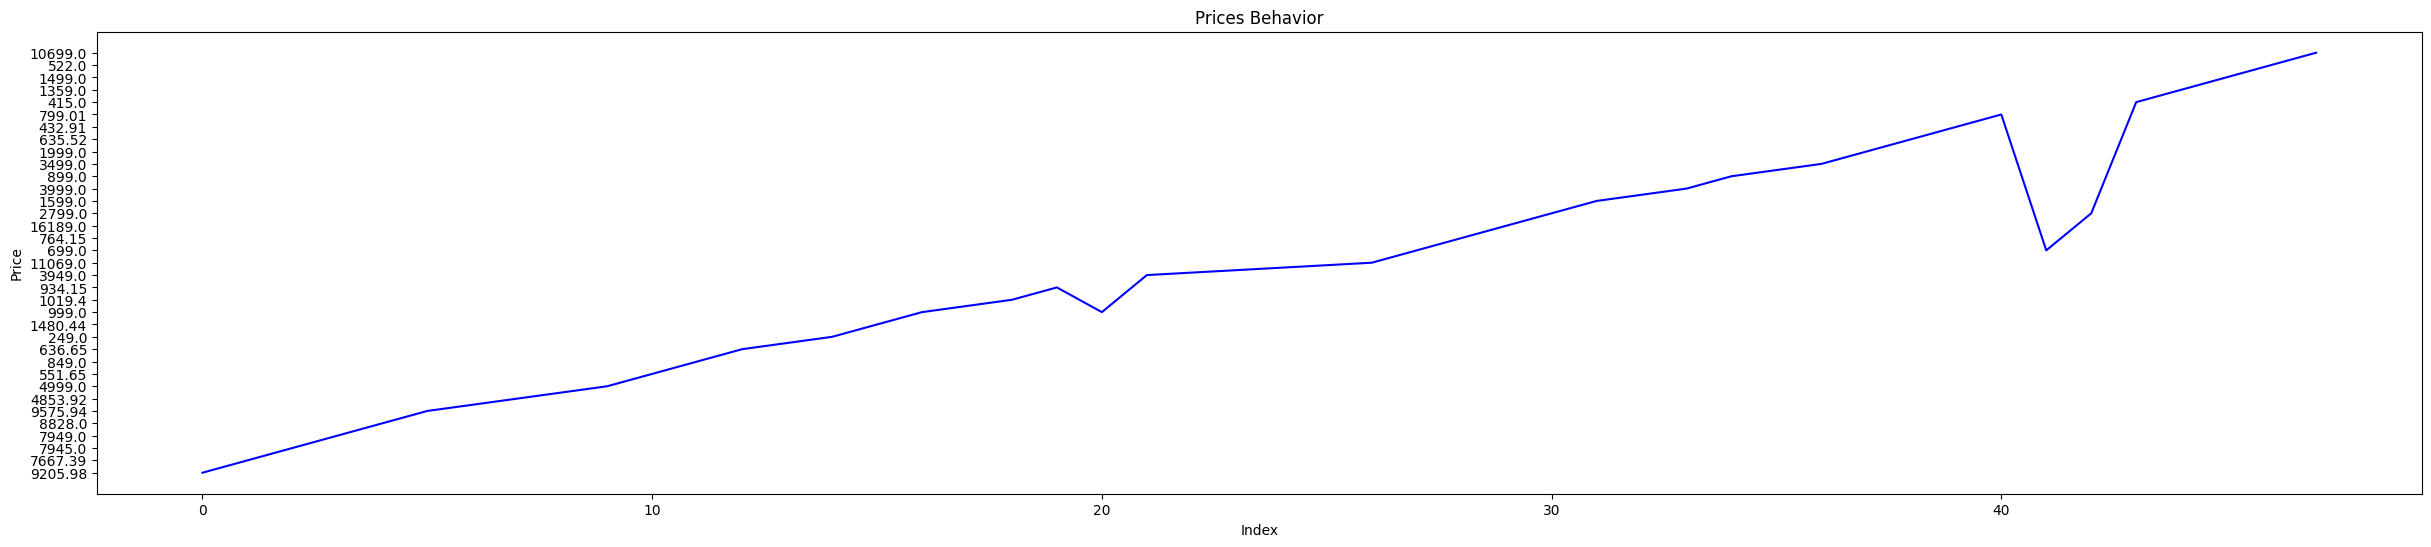

In [186]:
# Plot the behavior of the prices
plt.figure(figsize=(30, 6))
plt.plot(df['Price'], color='blue')
plt.title('Prices Behavior')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

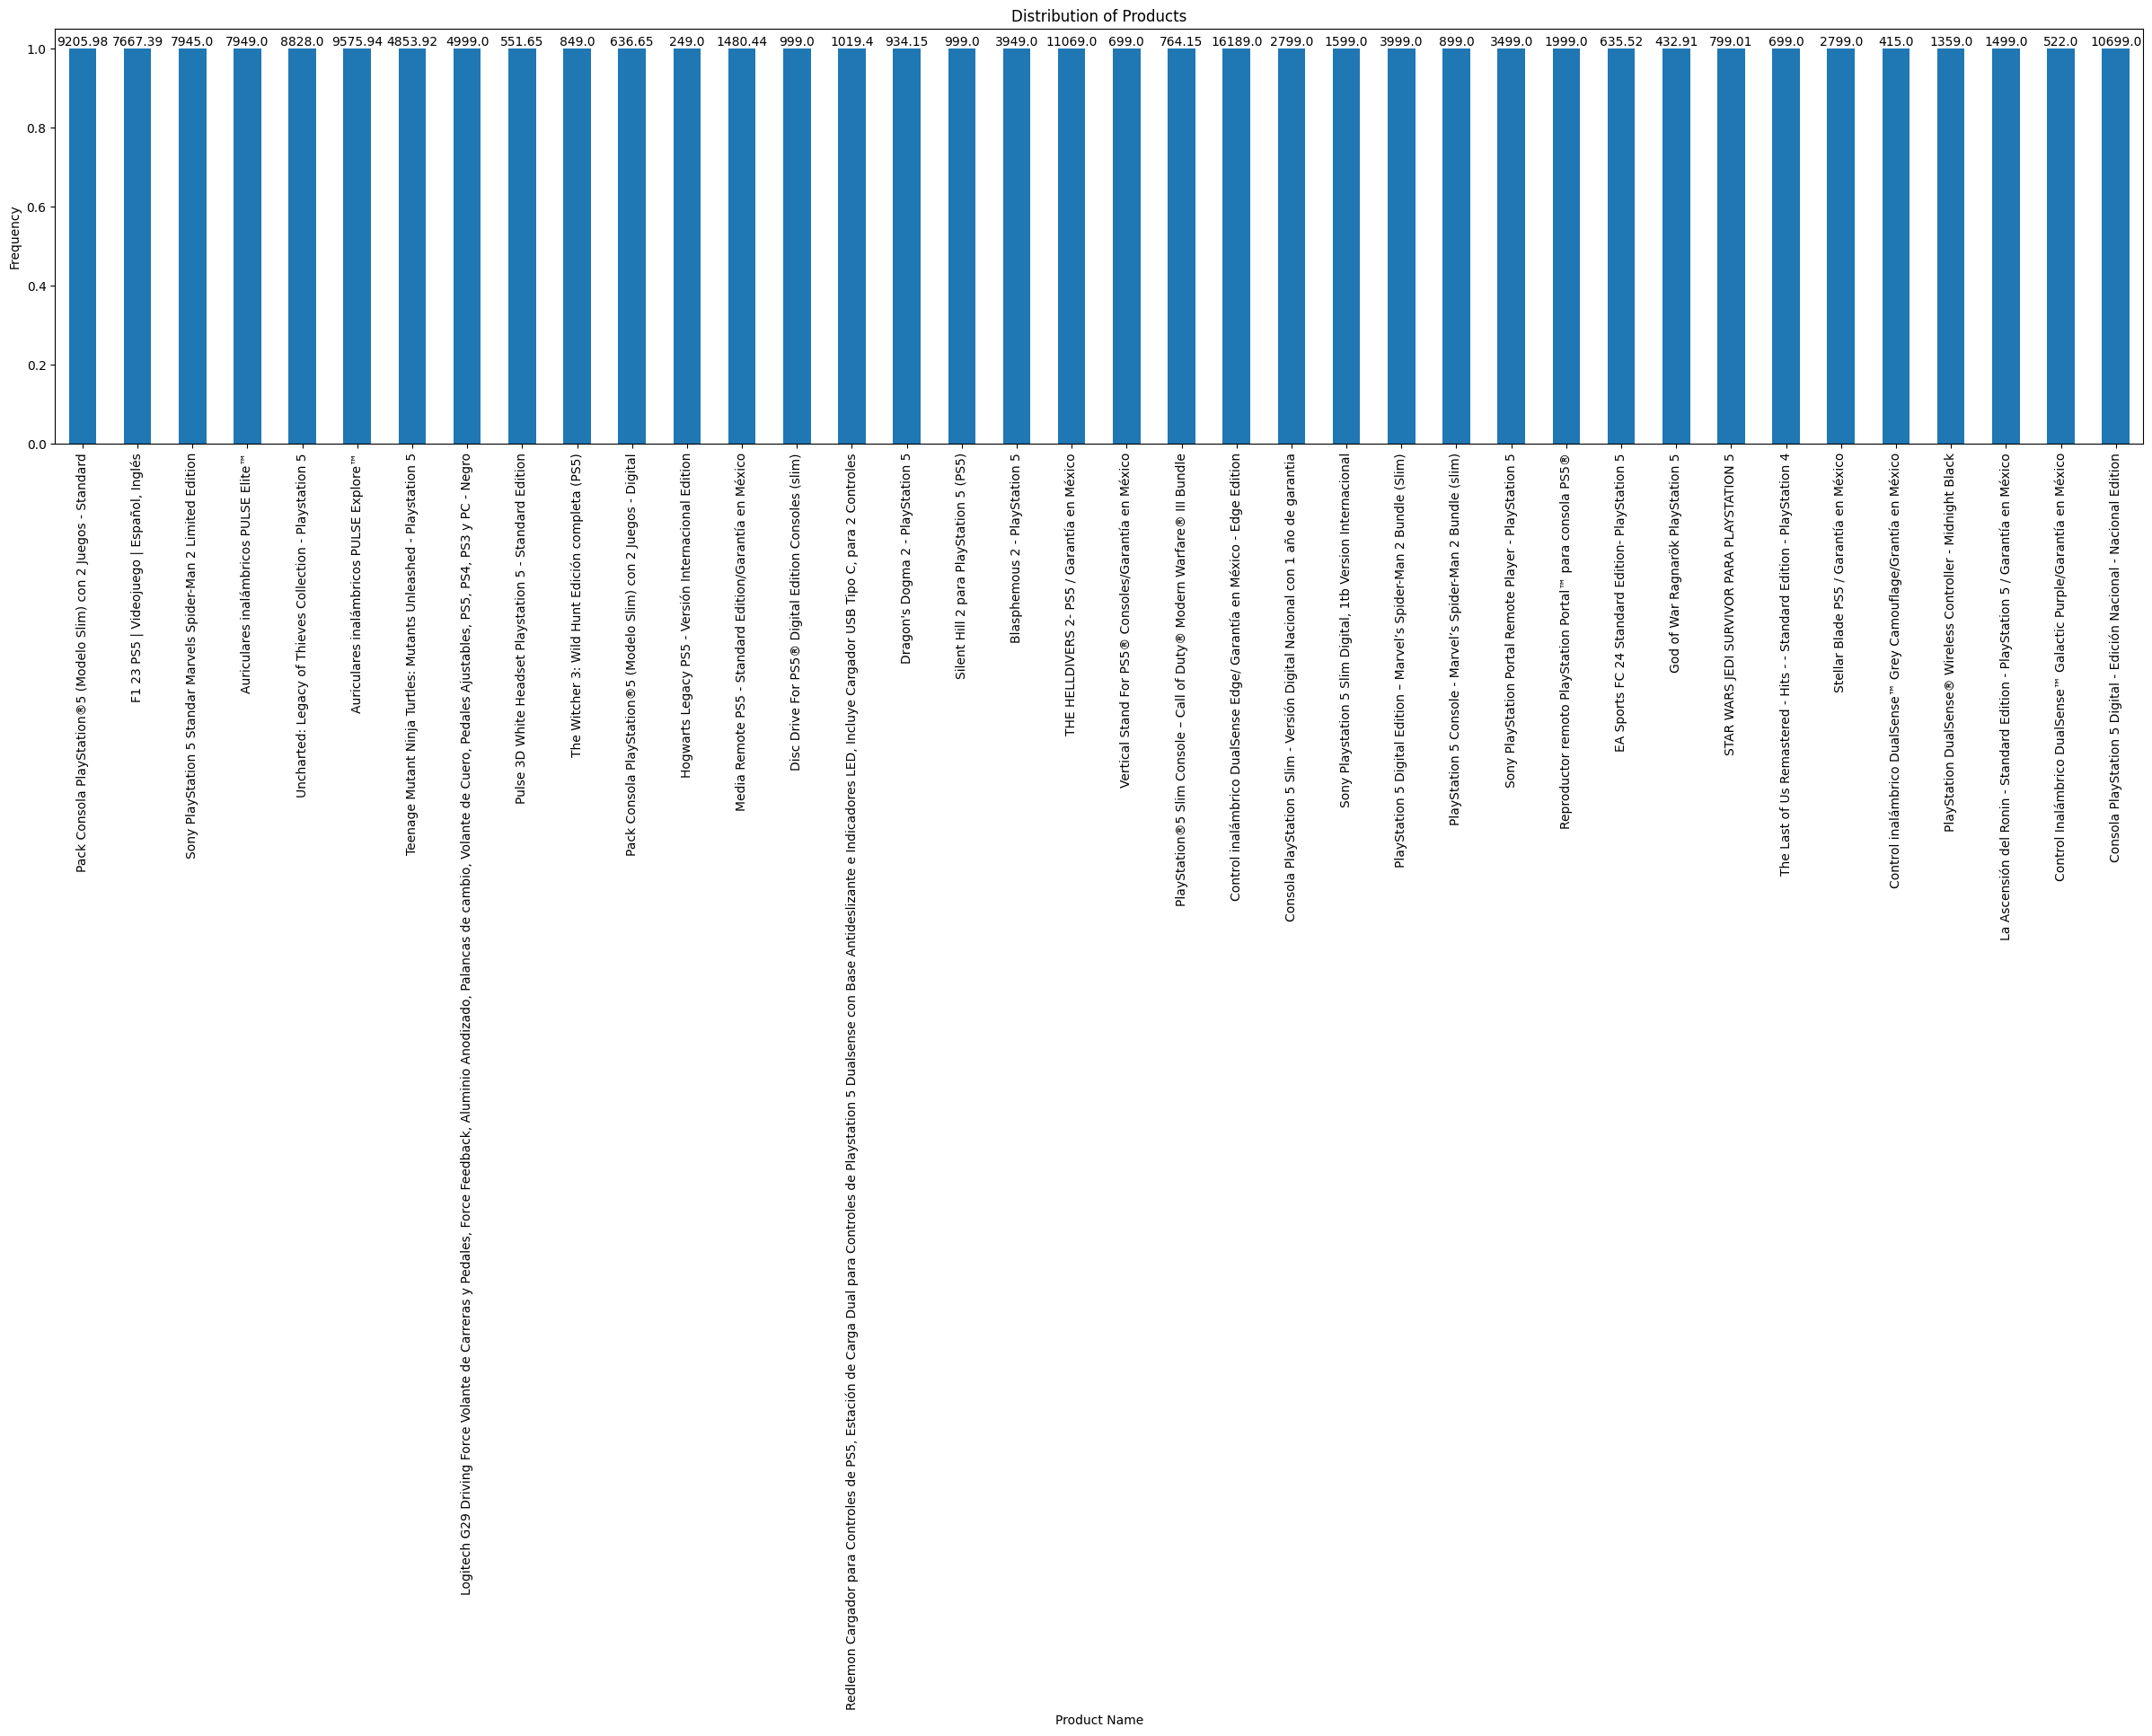

In [205]:
# Distribution of the products

# Reset index to ensure correct access
df.reset_index(drop=True, inplace=True)

# Distribution of the products
plt.figure(figsize=(30, 6))
ax = df['Product Name'].value_counts().plot(kind='bar')
plt.title('Distribution of Products')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
for i, v in enumerate(df['Product Name'].value_counts()):
    plt.text(i, v, df['Price'][i], ha='center', va='bottom')

plt.show()

## Personal reflection about the activity developped 

Engaging in web scraping activities has been an illuminating journey, offering insights into the intricacies of data extraction from online sources. Through this endeavor, I've honed my skills in Python programming, particularly in utilizing libraries like BeautifulSoup and requests, essential tools for navigating and parsing HTML content. Understanding the structure of web pages and discerning the most efficient ways to extract desired information has been intellectually stimulating. Moreover, encountering challenges such as handling dynamic content and evading detection mechanisms has fostered my problem-solving abilities, prompting creative solutions to overcome obstacles.

Furthermore, this activity has deepened my understanding of ethical considerations surrounding web scraping, emphasizing the importance of respecting website terms of service and data privacy regulations. By adhering to these principles, I've cultivated a sense of responsibility and integrity in my data acquisition practices.

Overall, the development of web scraping skills has not only enhanced my technical proficiency but also broadened my perspective on data accessibility and its ethical implications. This experience has underscored the significance of continuous learning and adaptability in navigating the evolving landscape of web technologies.

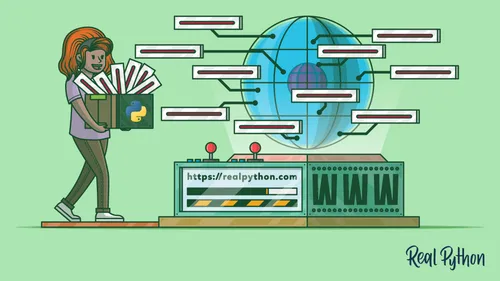